<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d emadmakhlouf/linearly-inseperable-dataset

Dataset URL: https://www.kaggle.com/datasets/emadmakhlouf/linearly-inseperable-dataset
License(s): MIT
  0% 0.00/6.05k [00:00<?, ?B/s]
100% 6.05k/6.05k [00:00<00:00, 23.3MB/s]


In [4]:
!unzip linearly-inseperable-dataset.zip

Archive:  linearly-inseperable-dataset.zip
  inflating: moonDataset.csv         


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import layers, Sequential, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [6]:
df = pd.read_csv("/content/moonDataset.csv")

In [7]:
df.head()

,X1,X2,X3,label
0,-0.926767,-0.111073,0.086017,0
1,-0.917583,0.706006,0.058041,0
2,0.437984,0.899093,0.072543,0
3,0.089694,0.291446,0.070444,1
4,0.110672,-0.070806,-0.090376,1


In [8]:
X = df.iloc[:,:-1]

In [9]:
y = df["label"]

In [10]:
print(X.shape)

(200, 3)


In [11]:
print(y.shape)

(200,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
model = Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),

    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

In [36]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [37]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # split your train set if needed
    epochs=400,
    batch_size=1,
    verbose=1
)

Epoch 1/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6222 - loss: 0.9531 - val_accuracy: 0.6562 - val_loss: 0.8478
Epoch 2/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7703 - loss: 0.7826 - val_accuracy: 0.8750 - val_loss: 0.7382
Epoch 3/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7063 - loss: 0.7357 - val_accuracy: 0.8438 - val_loss: 0.6507
Epoch 4/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7199 - loss: 0.7004 - val_accuracy: 0.8438 - val_loss: 0.5875
Epoch 5/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8383 - loss: 0.6024 - val_accuracy: 0.8750 - val_loss: 0.5578
Epoch 6/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7613 - loss: 0.5899 - val_accuracy: 0.8125 - val_loss: 0.5353
Epoch 7/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8212 - loss: 0.5262 - val_accuracy: 0.8750 - val_loss: 0.5169
Epoch 8/400
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8005 - loss: 0.5489 - val_accu

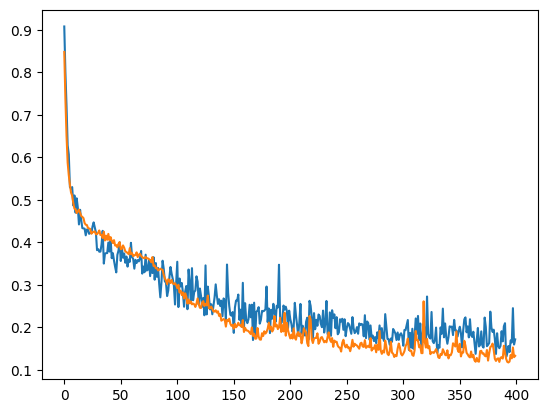

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [39]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - accuracy: 1.0000 - loss: 0.0991
Test Accuracy: 1.0000
